# Model for Traffic Sign Classifier
## Step 1: Load all modules that are necessary ##

In [1]:
####### Module to retrieve pickled data######
import pickle
from sklearn.utils import shuffle

########## Plotting Data ########
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import display, HTML
from tqdm import trange
import time
from datetime import datetime
from PreProcessing import load_data, preprocess_data, images_show

###### Visualizing DataFrame ########
import pandas as pd

####### Image Operations ###########
from skimage import img_as_ubyte
from skimage import img_as_float
import cv2

####### Mathematical & Array Operations #########
import numpy as np
import math
from random import randint
from collections import namedtuple

# Tensor FLow for Neural Network Frameworks
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from tensorflow.contrib.layers import apply_regularization
from tensorflow.contrib.layers import l1_regularizer
from tensorflow.contrib.layers import xavier_initializer
from spatial_transformer import transformer

Modules Imported


## Step 2: PreProcess Data and Visualize it ##

Data and Modules loaded
Scaling Start
Scaling all features between -1 and 1
Scaling Complete
Extending Dataset
Dataset Extended based on Flipping, Mirroring 0-180 Degrees
Data Augmentation Started


  0%|          | 0/43 [00:00<?, ?it/s]

Augmenting Data for Class Number: 0


  2%|▏         | 1/43 [00:12<08:49, 12.60s/it]

Augmenting Data for Class Number: 1
Augmenting Data for Class Number: 2
Augmenting Data for Class Number: 3


  9%|▉         | 4/43 [00:18<06:07,  9.42s/it]

Augmenting Data for Class Number: 4


 12%|█▏        | 5/43 [00:26<05:45,  9.09s/it]

Augmenting Data for Class Number: 5
Augmenting Data for Class Number: 6


 16%|█▋        | 7/43 [00:36<04:41,  7.83s/it]

Augmenting Data for Class Number: 7


 19%|█▊        | 8/43 [00:42<04:16,  7.33s/it]

Augmenting Data for Class Number: 8


 21%|██        | 9/43 [00:48<03:55,  6.93s/it]

Augmenting Data for Class Number: 9


 23%|██▎       | 10/43 [00:55<03:42,  6.73s/it]

Augmenting Data for Class Number: 10


 26%|██▌       | 11/43 [01:03<03:51,  7.24s/it]

Augmenting Data for Class Number: 11
Augmenting Data for Class Number: 12
Augmenting Data for Class Number: 13
Augmenting Data for Class Number: 14


 35%|███▍      | 15/43 [01:10<02:36,  5.59s/it]

Augmenting Data for Class Number: 15
Augmenting Data for Class Number: 16


 40%|███▉      | 17/43 [01:20<02:20,  5.39s/it]

Augmenting Data for Class Number: 17
Augmenting Data for Class Number: 18
Augmenting Data for Class Number: 19


 47%|████▋     | 20/43 [01:30<01:50,  4.79s/it]

Augmenting Data for Class Number: 20
Augmenting Data for Class Number: 21
Augmenting Data for Class Number: 22


 53%|█████▎    | 23/43 [02:01<02:09,  6.50s/it]

Augmenting Data for Class Number: 23


 56%|█████▌    | 24/43 [02:11<02:21,  7.47s/it]

Augmenting Data for Class Number: 24


 58%|█████▊    | 25/43 [02:23<02:39,  8.87s/it]

Augmenting Data for Class Number: 25


 60%|██████    | 26/43 [02:30<02:18,  8.17s/it]

Augmenting Data for Class Number: 26


 63%|██████▎   | 27/43 [02:35<01:56,  7.31s/it]

Augmenting Data for Class Number: 27


 65%|██████▌   | 28/43 [02:48<02:13,  8.89s/it]

Augmenting Data for Class Number: 28


 67%|██████▋   | 29/43 [02:58<02:11,  9.38s/it]

Augmenting Data for Class Number: 29


 70%|██████▉   | 30/43 [03:11<02:14, 10.31s/it]

Augmenting Data for Class Number: 30


 72%|███████▏  | 31/43 [03:19<01:55,  9.60s/it]

Augmenting Data for Class Number: 31


 74%|███████▍  | 32/43 [03:26<01:37,  8.89s/it]

Augmenting Data for Class Number: 32


 77%|███████▋  | 33/43 [03:35<01:30,  9.09s/it]

Augmenting Data for Class Number: 33


 79%|███████▉  | 34/43 [03:45<01:23,  9.28s/it]

Augmenting Data for Class Number: 34


 81%|████████▏ | 35/43 [03:55<01:15,  9.38s/it]

Augmenting Data for Class Number: 35
Augmenting Data for Class Number: 36


 86%|████████▌ | 37/43 [04:03<00:47,  7.84s/it]

Augmenting Data for Class Number: 37


 88%|████████▊ | 38/43 [04:12<00:40,  8.02s/it]

Augmenting Data for Class Number: 38
Augmenting Data for Class Number: 39
Augmenting Data for Class Number: 40


 95%|█████████▌| 41/43 [04:22<00:13,  6.60s/it]

Augmenting Data for Class Number: 41


 98%|█████████▊| 42/43 [04:35<00:08,  8.69s/it]

Augmenting Data for Class Number: 42


 16%|█▋        | 7/43 [00:00<00:00, 62.76it/s]

Balancing Dataset by truncating data at random


100%|██████████| 43/43 [00:00<00:00, 61.99it/s]


Making the dataset divisible by 100 by adding images
New Dataset Size: 86100
Number of training examples = 86100
Image data shape = (32, 32, 3)
Number of classes = 43
Image Datatype= float32


,ClassId,SignName,Counts,Horizontally Flippable,Vertically Flippable,Flippable Both Ways,CrossFlippable
0,0,Speed limit (20km/h),2047,no,no,no,no
1,1,Speed limit (30km/h),2002,no,yes,no,no
2,2,Speed limit (50km/h),2001,no,no,no,no
3,3,Speed limit (60km/h),2002,no,no,no,no
4,4,Speed limit (70km/h),2001,no,no,no,no
5,5,Speed limit (80km/h),2000,no,yes,no,no
6,6,End of speed limit (80km/h),2003,no,no,no,no
7,7,Speed limit (100km/h),1999,no,no,no,no
8,8,Speed limit (120km/h),2002,no,no,no,no
9,9,No passing,1999,no,no,no,no


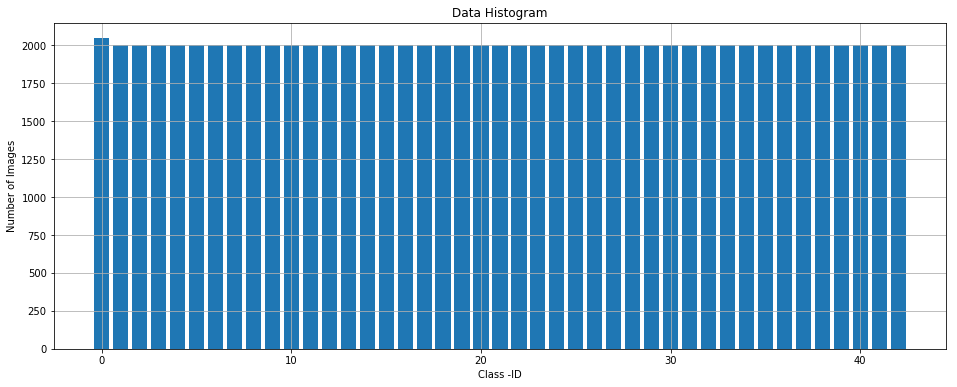

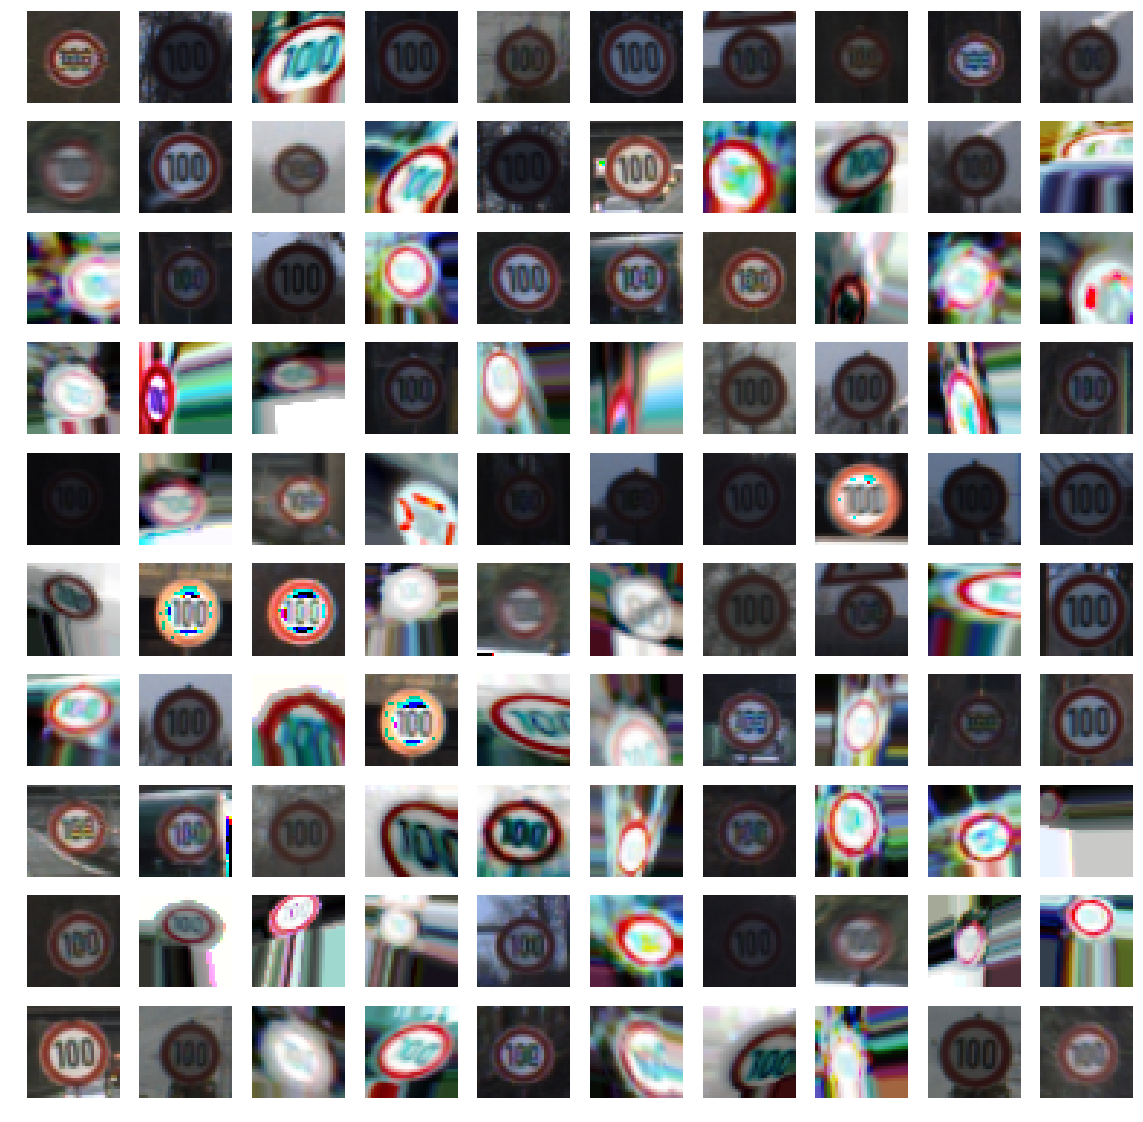

Data Saved in : train_aug.pickle
Data and Modules loaded
Scaling Start
Scaling all features between -1 and 1
Scaling Complete
Number of training examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43
Image Datatype= float32


,ClassId,SignName,Counts,Horizontally Flippable,Vertically Flippable,Flippable Both Ways,CrossFlippable
0,0,Speed limit (20km/h),30,no,no,no,no
1,1,Speed limit (30km/h),240,no,yes,no,no
2,2,Speed limit (50km/h),240,no,no,no,no
3,3,Speed limit (60km/h),150,no,no,no,no
4,4,Speed limit (70km/h),210,no,no,no,no
5,5,Speed limit (80km/h),210,no,yes,no,no
6,6,End of speed limit (80km/h),60,no,no,no,no
7,7,Speed limit (100km/h),150,no,no,no,no
8,8,Speed limit (120km/h),150,no,no,no,no
9,9,No passing,150,no,no,no,no


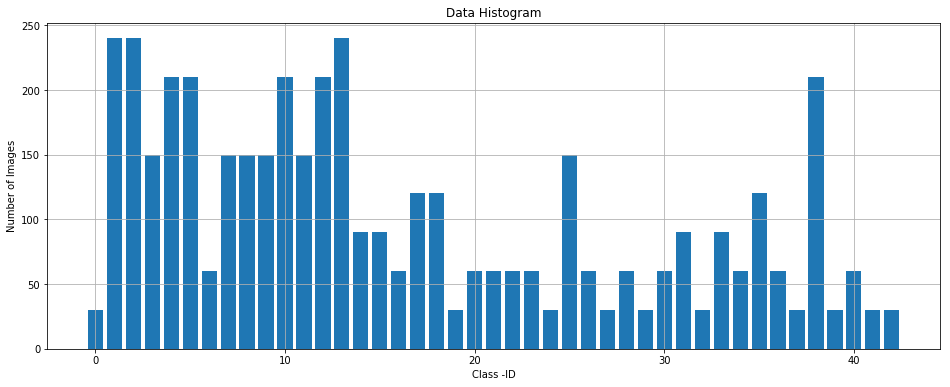

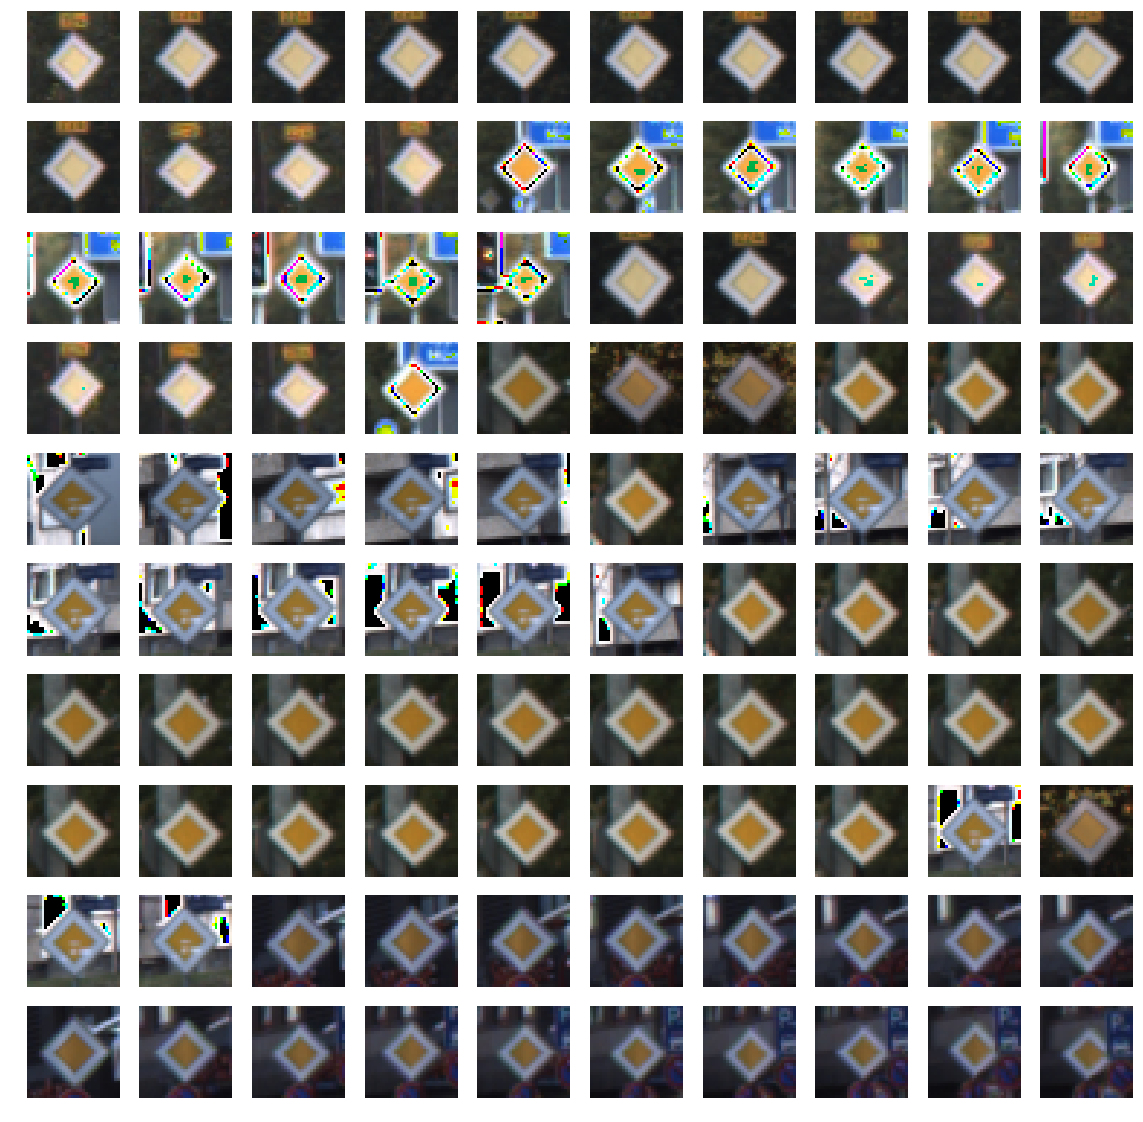

Data Saved in : valid_aug.pickle
Data and Modules loaded
Scaling Start
Scaling all features between -1 and 1
Scaling Complete
Number of training examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Image Datatype= float32


,ClassId,SignName,Counts,Horizontally Flippable,Vertically Flippable,Flippable Both Ways,CrossFlippable
0,0,Speed limit (20km/h),60,no,no,no,no
1,1,Speed limit (30km/h),720,no,yes,no,no
2,2,Speed limit (50km/h),750,no,no,no,no
3,3,Speed limit (60km/h),450,no,no,no,no
4,4,Speed limit (70km/h),660,no,no,no,no
5,5,Speed limit (80km/h),630,no,yes,no,no
6,6,End of speed limit (80km/h),150,no,no,no,no
7,7,Speed limit (100km/h),450,no,no,no,no
8,8,Speed limit (120km/h),450,no,no,no,no
9,9,No passing,480,no,no,no,no


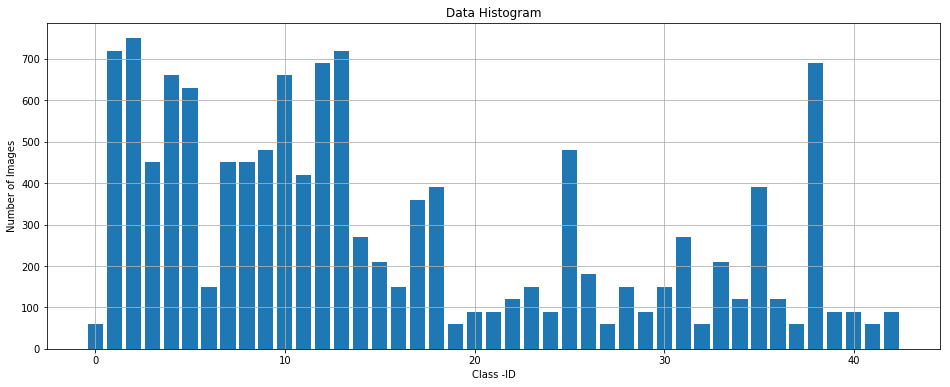

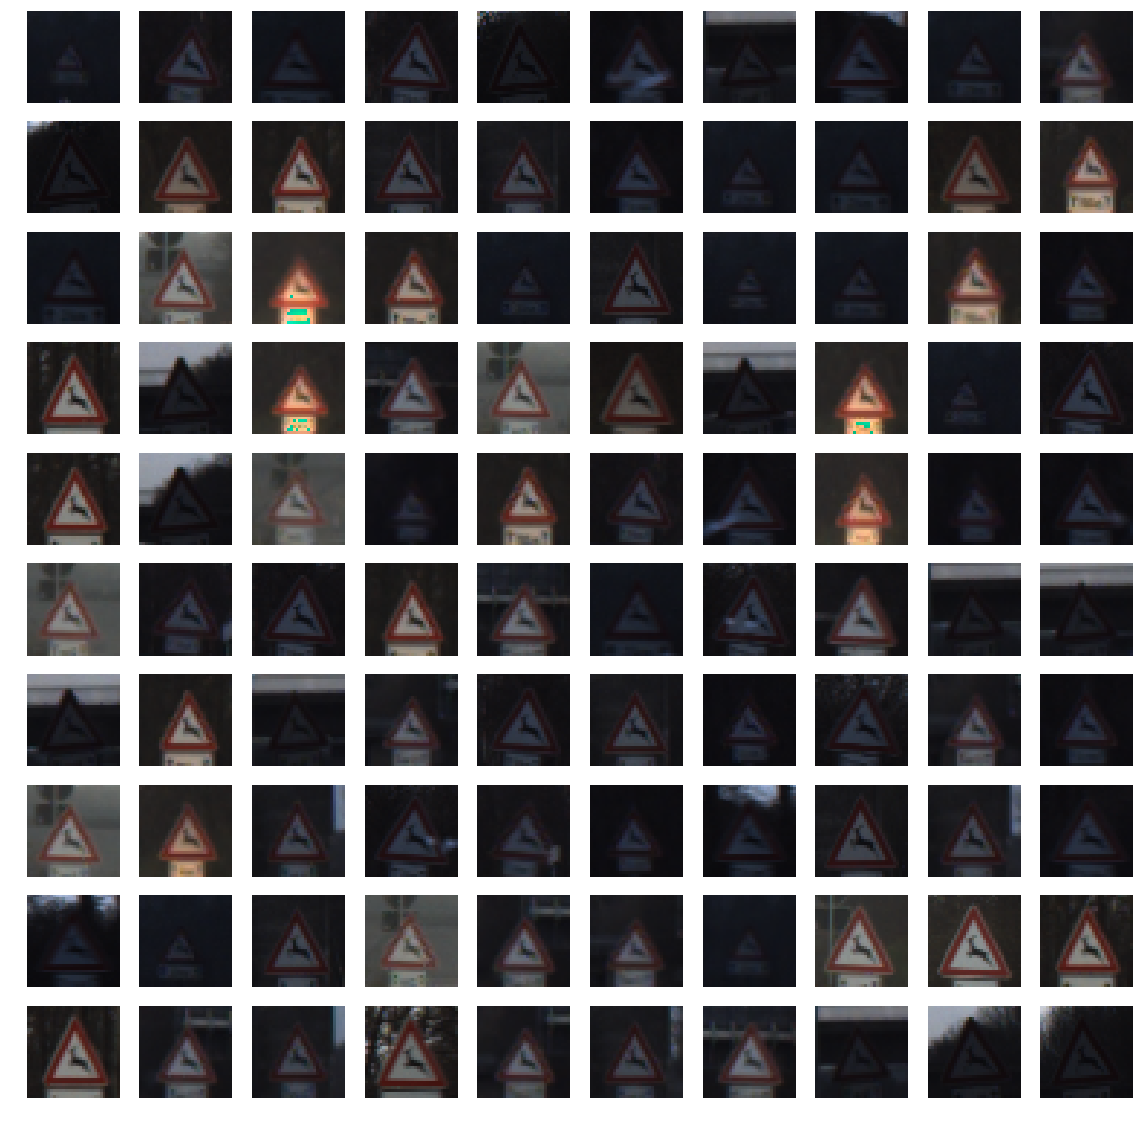

Data Saved in : test_aug.pickle


In [75]:
preprocess_data('train.pickle', 'train_aug.pickle', is_scale=True, is_extend=True, is_augment=True, sample_size=2000, intensity_factor=0.75, is_balance=True)
preprocess_data('valid.pickle', 'valid_aug.pickle', is_scale=True)
preprocess_data('test.pickle', 'test_aug.pickle', is_scale=True)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Modified LeNet Architecture With FeedForward and FeedBack Loops and Spatial Transform Based Architecture


In [2]:
def variable_summaries(var):
    """Attach a lot of summaries to a Tensor (for TensorBoard visualization)."""
    with tf.name_scope('summaries'):
        mean = tf.reduce_mean(var)
        tf.summary.scalar('mean', mean)
        with tf.name_scope('stddev'):
            stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
        tf.summary.scalar('stddev', stddev)
        tf.summary.scalar('max', tf.reduce_max(var))
        tf.summary.scalar('min', tf.reduce_min(var))
        tf.summary.histogram('histogram', var)

tf.reset_default_graph()
########## Graph Inputs #########################
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int64, (None))
num_classes = 43
reg_fac = tf.placeholder(tf.float32, None)
rate = tf.placeholder(tf.float32, None)
is_training = tf.placeholder(tf.bool, None)

### Basic Elements of the VGG Network
- ** Batch Normalization Layer ** For faster and better training 
- **Param Relu** For solving Dead Linear Rectifier issue during training
- **Convolution Layer** With Parametric Relay Activation - Weights and Biases Initialization - Xavier Scheme
- **Fully Connected Layer** With Fully Connected Dense Layers - Weights and Biases Initialization - Xavier Scheme
- ** Pooling Layer** Max Pool 2D Operation

In [3]:
############################# Batch Normalization Layer ##################
def batch_norm(input_, name, n_out, phase_train):
    with tf.variable_scope(name + 'bn'):
        beta = tf.Variable(tf.constant(
            0.0, shape=[n_out]), name=name + 'beta', trainable=True)
        gamma = tf.Variable(tf.constant(
            1.0, shape=[n_out]), name=name + 'gamma', trainable=True)
        if len(input_.get_shape().as_list()) > 3:
            batch_mean, batch_var = tf.nn.moments(
                input_, [0, 1, 2], name=name + 'moments')
        else:
            batch_mean, batch_var = tf.nn.moments(
                input_, [0, 1], name=name + 'moments')
        ema = tf.train.ExponentialMovingAverage(decay=0.5)

        def mean_var_with_update():
            ema_apply_op = ema.apply([batch_mean, batch_var])
            with tf.control_dependencies([ema_apply_op]):
                return tf.identity(batch_mean), tf.identity(batch_var)

        mean, var = tf.cond(phase_train, mean_var_with_update, lambda: (
            ema.average(batch_mean), ema.average(batch_var)))
        normed = tf.nn.batch_normalization(
            input_, mean, var, beta, gamma, 1e-3)

    variable_summaries(beta)
    variable_summaries(gamma)
    return normed

############################## Parametric ReLU Activation  Layer #########


def parametric_relu(input_, name):
    alpha = tf.get_variable(name=name + '_alpha', shape=input_.get_shape(
    )[-1], initializer=tf.random_uniform_initializer(minval=0.1, maxval=0.3), dtype=tf.float32)
    pos = tf.nn.relu(input_)
    tf.summary.histogram(name, pos)
    neg = alpha * (input_ - abs(input_)) * 0.5
    return pos + neg


# Convolutional Layer with activation and batc
def conv(input_, name, k1, k2, n_o, reg_fac, is_tr, s1=1, s2=1, is_act=True, is_bn=True, padding='SAME'):

    n_i = input_.get_shape()[-1].value
    with tf.variable_scope(name):
        weights = tf.get_variable(name + "weights", [k1, k2, n_i, n_o], tf.float32, xavier_initializer(
        ), regularizer=tf.contrib.layers.l2_regularizer(reg_fac))
        biases = tf.get_variable(name +
                                 "bias", [n_o], tf.float32, tf.constant_initializer(0.0))
        conv = tf.nn.conv2d(input_, weights, (1, s1, s2, 1), padding=padding)
        bn = batch_norm(conv, name, n_o, is_tr) if is_bn else conv
        activation = parametric_relu(tf.nn.bias_add(
            bn, biases), name + "activation") if is_act else tf.nn.bias_add(bn, biases)
        variable_summaries(weights)
        variable_summaries(biases)
    return activation

# Fully connected Layer with activation and ba


def fc(input_, name, n_o, reg_fac, is_tr, p_fc, is_act=True, is_bn=True):
    n_i = input_.get_shape()[-1].value
    with tf.variable_scope(name):
        weights = tf.get_variable(name + "weights", [n_i, n_o], tf.float32, xavier_initializer(
        ),  regularizer=tf.contrib.layers.l2_regularizer(reg_fac))
        biases = tf.get_variable(
            name + "bias", [n_o], tf.float32, tf.constant_initializer(0.0))
        bn = tf.nn.bias_add(tf.matmul(input_, weights), biases)
        activation = batch_norm(bn, name, n_o, is_tr) if is_bn else bn
        logits = parametric_relu(
            activation, name + "activation") if is_act else activation
        
        variable_summaries(weights)
        variable_summaries(biases)

    return tf.cond(is_tr, lambda: tf.nn.dropout(logits, keep_prob=p_fc), lambda: logits)

############################# Max Pooling Layer with activation ##########


def pool(input_, name, k1, k2, s1=2, s2=2):
    return tf.nn.max_pool(input_, ksize=[1, k1, k2, 1], strides=[1, s1, s2, 1], padding='VALID', name=name)

## Spatial Transformer Layer :
The spatial transformation layer consists of a localization layer and an affine transformation layer

### Localization layer
* 7x7  Convolution Filter 
* 5x5 Convolution Filter 
* 3x3 Convolution Filter 
* 128 Dense Layer 
* 64 Dense Layer 
* 6 for Identity Transform 

### Affine Transformation 

In [4]:
############################# Localization Layer for Spatial Transformer L
def localization_net(input_, name, is_tr, reg_fac):
    # Identity transformation
    initial = np.array([[1., 0, 0], [0, 1., 0]])
    initial = initial.astype('float32')
    initial = initial.flatten()
    # Weight and Bias containing the identity transformation
    W = tf.get_variable('loc_weights', [64, 6], tf.float32, xavier_initializer(
    ), regularizer=tf.contrib.layers.l2_regularizer(reg_fac))
    b = tf.Variable(initial_value=initial, name='loc_bias')

    ############ Localization Network for the Spatial transformer network ####
    ##################### 7x7x16 Conv -> 2x2 Max pooling ###################
    locnet = conv(input_, name="locnet_conv1", k1=5, k2=5, n_o=16,
                  reg_fac=reg_fac, is_tr=is_tr, padding='VALID')
    locnet = pool(locnet, name="locnet_pool1", k1=2, k2=2)

    ###################### 5x5x32 Conv -> 2x2 Max pooling ###################
    locnet = conv(locnet, name="locnet_conv2", k1=3, k2=3, n_o=32,
                  reg_fac=reg_fac, is_tr=is_tr, padding='VALID')
    locnet = pool(locnet, name="locnet_pool2", k1=2, k2=2)

    ###################### 3x3x64 Conv -> 2x2 Max pooling ####################
    locnet = conv(locnet, name="locnet_conv3", k1=1, k2=1, n_o=64,
                  reg_fac=reg_fac, is_tr=is_tr, padding='VALID')
    locnet = pool(locnet, name="locnet_pool3", k1=2, k2=2)

    ####################### Fully Connected Layers ###########################
    locnet_fc0 = flatten(locnet)
    locnet_fc1 = fc(locnet_fc0, name="locnet_fc1", n_o=128,
                    reg_fac=reg_fac, is_tr=is_tr, p_fc=1.0)
    locnet_fc2 = fc(locnet_fc1, name="locnet_fc2", n_o=64,
                    reg_fac=reg_fac, is_tr=is_tr, p_fc=1.0)
    locnet_op = tf.nn.bias_add(tf.matmul(locnet_fc2, W), b)

    return locnet_op

### VGG Layer
- 2 Back to Back **Convolutions** of same Kernel Size and Strides and Padding as specified by the user
- 1 **Pooling** Layer.
- 1 **Dropout** Layer

In [5]:
def VGG_Layer(input_, name, conv_size, pool_size, n_o, reg_fac, is_tr, p_vgg):

    n_i = input_.get_shape()[-1].value
    c_k1 = conv_size
    c_k2 = conv_size
    p_k1 = pool_size
    p_k2 = pool_size

    ############## VGG Building Block ###############################
    ############## 2 - Conv , 1- Pool 1- Dropout 1 - Batch-Norm ##############
    vgg = conv(input_, name=name + "conv1_1", k1=c_k1,
               k2=c_k2, n_o=n_o, reg_fac=reg_fac, is_tr=is_tr)
    vgg = conv(vgg, name=name + "conv1_2", k1=c_k1, k2=c_k2,
               n_o=n_o, reg_fac=reg_fac, is_tr=is_tr)
    vgg = pool(vgg, name=name + "pool1", k1=p_k1, k2=p_k2)
    vgg = tf.cond(is_tr, lambda: tf.nn.dropout(
        vgg, keep_prob=p_vgg), lambda: vgg)
    return vgg

### Model definition
#### Number of Layers:
- *3* **VGG** Layers
    - First VGG Layer extracts 64 Feature Maps
    - Second VGG Layer extracts 128 Feature Maps
    - Third VGG Layer extracts 256 Feature Maps
- *2* **FC** Layers
    - Fully Connected Layers 512 Hidden Units
    - To 43 Units dependent on the number of classes

#### Reason for Choosing Architecture:
- LeNet acrhitecture provides 96.5% test accuracy 
- To get the extra 2% accuracy on the model.

In [6]:
def run_model(input_, num_classes, params, reg_fac, is_training):

    ############## Spatial Transformer Module ######################
    ##################### Localization layer #######################
    locnet = localization_net(input_, name="locnet",
                              reg_fac=reg_fac, is_tr=is_training)
    ####################### Affine Transformation Layer ############
    stn = transformer(input_, locnet, out_size=(32, 32, 3))
    stn_= tf.reshape(stn,(-1,32,32,3))
    ################################## VGG Net ###############################
    ################################# VGG- Layer - 1 #########################
    vgg1 = VGG_Layer(stn_, "vgg1", conv_size=3, pool_size=2, n_o=32,
                     reg_fac=reg_fac, is_tr=is_training, p_vgg=params.vgg1)
    ################################# VGG- Layer - 2 #########################
    vgg2 = VGG_Layer(vgg1, "vgg2", conv_size=3, pool_size=2, n_o=64,
                     reg_fac=reg_fac, is_tr=is_training, p_vgg=params.vgg2)
    ################################# VGG- Layer - 3 #########################
    vgg3 = VGG_Layer(vgg2, "vgg3", conv_size=3, pool_size=2, n_o=128,
                     reg_fac=reg_fac, is_tr=is_training, p_vgg=params.vgg3)
    ################################# VGG- Layer - 4 #########################
    vgg4 = VGG_Layer(vgg3, "vgg4", conv_size=3, pool_size=2, n_o=256,
                     reg_fac=reg_fac, is_tr=is_training, p_vgg=params.vgg4)

    
    ################################ Multi Scale Convolution layer ###########
    ms1 = pool(vgg2, "ms1", k1=5, k2=5)
    ms2 = pool(vgg3, "ms2", k1=2, k2=2)
    ms = tf.concat([ms1, ms2, vgg4], axis=3)
    ms = conv(ms, "ms", k1=1, k2=1, n_o=512, reg_fac=reg_fac,
              is_tr=is_training, padding='VALID')
    ms = batch_norm(ms, "ms",512, is_training)
    ms = parametric_relu(ms, "ms")
    ms_drop = tf.cond(is_training, lambda: tf.nn.dropout(
        ms, keep_prob=params.ms), lambda: ms)

    ################## Fully Connected Layers for a Linear Classifier ########
    #############################First Fully Connected Layer #################
    fc0 = fc(flatten(ms_drop), "fc0", 1024, reg_fac=reg_fac,
             is_tr=is_training, p_fc=params.fc0)
    fc1 = fc(fc0, "fc1", 512, reg_fac=reg_fac,
             is_tr=is_training, p_fc=params.fc1)
    ########################### Output readout Layer #########################
    fc2 = fc(fc1, "fc2", num_classes, reg_fac=reg_fac,
             is_tr=is_training, p_fc=1.0, is_act=False, is_bn=True)

    return fc2

### Model Building with Hyper_params

In [7]:
params = namedtuple('params', 'vgg1 vgg2 vgg3 vgg4 ms fc0 fc1')
mdltype = params(vgg1=1.0, vgg2=1.0, vgg3=1.0, vgg4=1.0, ms=1.0, fc0=.5, fc1=.5)
logits = run_model(x, num_classes, mdltype, reg_fac, is_training)
tf.summary.histogram('Logits', logits)

# For Top 5 Guesses
prediction = tf.nn.softmax(logits)
top5_guesses = tf.nn.top_k(prediction, k=5, sorted=True)


# Predicted Label and Actual Label using Argmax
y_pred = tf.argmax(logits, 1)

# Accuracy Calculation
correct_prediction = tf.equal(y_pred, y)
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
tf.summary.scalar('Accuracy', accuracy_operation)

######### Cross Entropy and Loss for Training ##########
cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
    logits=logits, labels=y, name='cross_entropy')
loss_operation = tf.reduce_mean(
    cross_entropy) + tf.add_n(tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES))
tf.summary.scalar('Loss', loss_operation)

########### Training Step ################
Train_Step = tf.train.AdamOptimizer(rate).minimize(loss_operation)
summary = tf.summary.merge_all()

In [8]:
def evaluate(X_data, y_data, batch_size, is_tr):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        bx, by = X_data[offset:offset +
                        batch_size], y_data[offset:offset + batch_size]
        inputs_ = {x: bx, y: by, is_training: is_tr}
        accuracy = sess.run(accuracy_operation, feed_dict=inputs_)
        total_accuracy += (accuracy * len(bx))
    return total_accuracy / num_examples

### Model Hyper Parameter Definition
- The Hyper Parameters are chosen based on search over 5 epochs
#### Tuning Methodology

- Xavier Initialization
- **Early Stopping** - Restore Chkpt if the accuracy gains in validation don't meet requirements
- **Hyper Parameter** Search over 5 Epcochs for Initial Tuning Hyper Params for best choice of hyper params 
    - Batch Sizes-100,200,300,500
    - Learning rates- 1e-3,5e-4,4e-4,1e-4
    - Regularization factor 1e-5,1e-4, 5e-4
- **Learning rate annealing**,  **Batch size increment**, **Increase dropout rate**

In [11]:
training_file = 'train_aug.pickle'
validation_file = 'valid_aug.pickle'
testing_file = 'test_aug.pickle'
X_train,y_train = load_data(training_file)
X_valid,y_valid = load_data(validation_file)
X_test,y_test = load_data(testing_file)

Data and Modules loaded
Data and Modules loaded
Data and Modules loaded


In [17]:
BATCH_SIZE = 400
EPOCHS = 10
REG_FACTOR = 1e-5
RATE = 1e-4
save_file = "VGGNet_12042017"
chkpt = './' + save_file
logdir = chkpt + datetime.now().strftime('%Y%m%d-%H%M%S') + '/'

In [18]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()
sess = tf.Session()
with sess.as_default():
    sess.run(init)
    ##################  Start Model Training  #######################
    saver.restore(sess,chkpt)
    summary_writer = tf.summary.FileWriter(logdir, sess.graph)
    print("Training...")
    print()
    val_acc = []
    for i in range(EPOCHS):
        
        ############ Training Operation ################
        Training_loss = 0
        X_train, y_train = shuffle(X_train, y_train)
        for offset in trange(0, len(X_train), BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            inputs = {x: batch_x, y: batch_y, reg_fac: REG_FACTOR,
                      rate: RATE, is_training: True}
            loss, _ = sess.run([loss_operation, Train_Step], feed_dict=inputs)
            Training_loss += (loss * len(batch_x))

        ################ Evaluation operation ####################
        Validation_Accuracy = evaluate(X_valid, y_valid, 1000, is_tr=False)
        val_acc.append(Validation_Accuracy)
        Training_loss /= len(X_train)
        print("Epochs:", i + 1)
        print("Training_Loss:", Training_loss)
        print("Validation_Accuracy:", Validation_Accuracy)
        
        
        ##### Save Model if the Validation accuracy gets better
        if (max(val_acc) == Validation_Accuracy):
            saver.save(sess, chkpt)
            print("Intermediate Model Save")
            summary_str = sess.run(summary, feed_dict=inputs)
            summary_writer.add_summary(summary_str, i)
            
print("Model saved")

Training...



100%|██████████| 216/216 [02:21<00:00,  1.21it/s]


Epochs: 1
Training_Loss: 1.77755753905
Validation_Accuracy: 0.989795917016
Intermediate Model Save


100%|██████████| 216/216 [02:15<00:00,  2.02it/s]


Epochs: 2
Training_Loss: 1.77721636913
Validation_Accuracy: 0.992517051513
Intermediate Model Save


100%|██████████| 216/216 [02:15<00:00,  2.02it/s]


Epochs: 3
Training_Loss: 1.77724679214
Validation_Accuracy: 0.992743819479
Intermediate Model Save


100%|██████████| 216/216 [02:15<00:00,  2.02it/s]


Epochs: 4
Training_Loss: 1.77687934882
Validation_Accuracy: 0.99342408283
Intermediate Model Save


100%|██████████| 216/216 [02:15<00:00,  2.02it/s]


Epochs: 5
Training_Loss: 1.77675777071
Validation_Accuracy: 0.992970571226


100%|██████████| 216/216 [02:15<00:00,  2.02it/s]


Epochs: 6
Training_Loss: 1.77640942719
Validation_Accuracy: 0.991610020196


100%|██████████| 216/216 [02:15<00:00,  2.02it/s]


Epochs: 7
Training_Loss: 1.77640235826
Validation_Accuracy: 0.991609990462


100%|██████████| 216/216 [02:15<00:00,  2.02it/s]


Epochs: 8
Training_Loss: 1.77614683847
Validation_Accuracy: 0.992743765416


100%|██████████| 216/216 [02:15<00:00,  2.02it/s]


Epochs: 9
Training_Loss: 1.77578333695
Validation_Accuracy: 0.990249452948


 25%|██▌       | 54/216 [00:33<01:41,  1.59it/s]


KeyboardInterrupt: 

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
saver=tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess,chkpt)
    test_accuracy = evaluate(X_test, y_test, 500, False)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.986


In [20]:
import matplotlib.gridspec as gridspec
from skimage import exposure
from skimage import img_as_ubyte
from skimage import img_as_float
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import argparse
from tensorflow.python.framework import graph_util


def image_normalizer(X):
    n_h=X.shape[0]
    n_w=X.shape[1]
    X= cv2.cvtColor(X, cv2.COLOR_BGR2RGB)
    if (n_h !=32 or n_w!=32):
        X= cv2.resize(X, (32, 32), interpolation = cv2.INTER_CUBIC)
    X = (X / 255.-.999).astype(np.float32)
    return X


    
def visualize_predictions(images,image_names,top5_pred):
    df=pd.read_csv('./'+'signnames.csv')
    if (len(images.shape)==4 and (images.shape[3]!=3)):
        images=np.reshape(images,(images.shape[0],images.shape[1],-1))

    for i in range(len(images)):
        plt.figure(figsize = (5,1.5))
        gs = gridspec.GridSpec(1, 2,width_ratios=[2,3])
        plt.subplot(gs[0])
        plt.imshow(images[i],cmap='gray')
        plt.axis('off')
        plt.subplot(gs[1])
        plt.barh(6-np.arange(5),top5_pred[0][0], align='center')
        for i_label in range(5):
            plt.text(top5_pred[0][0][i_label]+0.1,6-i_label-.25, df['SignName'][top5_pred[1][i][i_label]])
        plt.axis('off');
        plt.text(0,6.95,image_names[i].split('.')[0])
        plt.show()    


In [21]:
###### Load Model and Open 
def run_model(images,image_names):
    saver=tf.train.Saver()
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        top5_pred = sess.run(top5_guesses, feed_dict={x:images,is_training: False})
        print(top5_pred)
    visualize_predictions(images,image_names,top5_pred)

def test_classifier(img_path):
    randomtestdata = [image_normalizer(cv2.imread(img_path+name,1)) for name in os.listdir(img_path) if (name.endswith('.png')  or name.endswith('.jpg'))]
    namenewdata = [name for name in os.listdir(img_path) if ( name.endswith('.png') or name.endswith('.jpg') )]
    rndtestint = img_as_float(randomtestdata)
    images_show(rndtestint,1,len(namenewdata),rand=False)
    run_model(rndtestint,namenewdata)

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

### Predict the Sign Type for Each Image

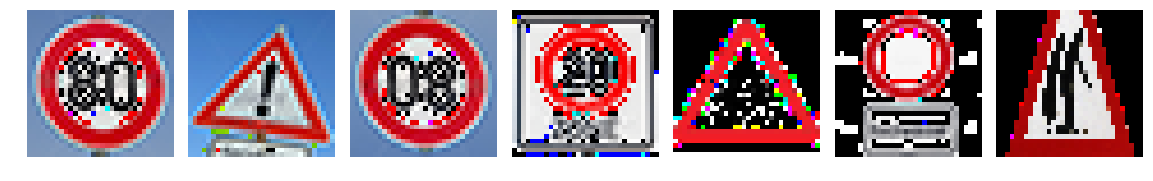

TopKV2(values=array([[  9.95684266e-01,   6.84245431e-04,   6.73789065e-04,
          2.00291310e-04,   1.21831472e-04],
       [  9.98950064e-01,   1.33357098e-04,   6.06143403e-05,
          4.14626775e-05,   3.66707209e-05],
       [  7.69487739e-01,   1.25710994e-01,   1.31051764e-02,
          9.25220456e-03,   7.28766667e-03],
       [  9.96652424e-01,   2.35485102e-04,   2.02036346e-04,
          1.81706593e-04,   1.35562412e-04],
       [  2.22515449e-01,   2.14782611e-01,   1.39142945e-01,
          1.25386238e-01,   2.23842021e-02],
       [  9.72566724e-01,   3.78147420e-03,   2.16599135e-03,
          1.09803712e-03,   1.09150808e-03],
       [  6.88459277e-01,   5.68733104e-02,   5.49869537e-02,
          3.55755240e-02,   1.60576925e-02]], dtype=float32), indices=array([[ 5,  1,  2,  4, 16],
       [18, 15, 20, 14, 37],
       [ 1,  4, 40, 16, 19],
       [ 1, 14,  3,  8,  0],
       [ 3, 28, 11, 35,  2],
       [15,  9, 10, 14,  3],
       [18, 20, 15, 26, 11]], dtype=in

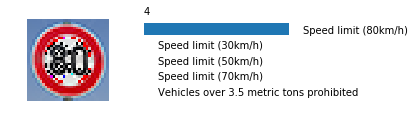

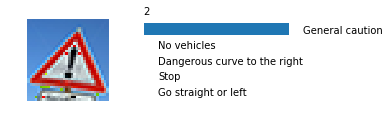

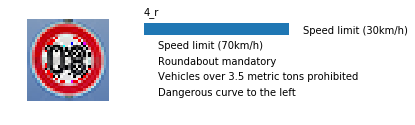

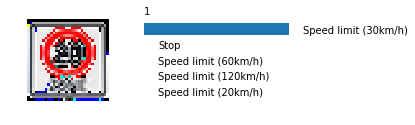

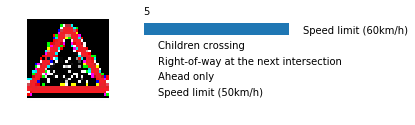

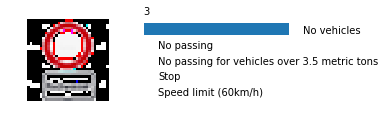

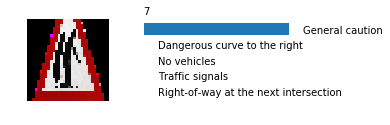

In [22]:
### Define Path of Test Images
image_path ="./Test_images/"
test_classifier(image_path)

## Visualize the top 5 predictions
### The concept of Visualization is borrowed from Vivek Yadav - Who has intelligently used matplot lib to view the top 5 predictions

## Other Images that are not from the GTSRB 
### Similar but color difference based Images

In [ ]:
otherimage_path ="./OtherSigns/"
test_classifier(otherimage_path)

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
def freeze_graph(model_folder):
    # We retrieve our checkpoint fullpath
    checkpoint = tf.train.get_checkpoint_state(model_folder)
    input_checkpoint = checkpoint.model_checkpoint_path
    
    # We precise the file fullname of our freezed graph
    absolute_model_folder = "/".join(input_checkpoint.split('/')[:-1])
    output_graph = absolute_model_folder + "/frozen_model.pb"

    # Before exporting our graph, we need to precise what is our output node
    # This is how TF decides what part of the Graph he has to keep and what part it can dump
    # NOTE: this variable is plural, because you can have multiple output nodes
    output_node_names = "Accuracy/predictions"

    # We clear devices to allow TensorFlow to control on which device it will load operations
    clear_devices = True
    
    # We import the meta graph and retrieve a Saver
    saver = tf.train.import_meta_graph(input_checkpoint + '.meta', clear_devices=clear_devices)

    # We retrieve the protobuf graph definition
    graph = tf.get_default_graph()
    input_graph_def = graph.as_graph_def()

    # We start a session and restore the graph weights
    with tf.Session() as sess:
        saver.restore(sess, input_checkpoint)

        # We use a built-in TF helper to export variables to constants
        output_graph_def = graph_util.convert_variables_to_constants(
            sess, # The session is used to retrieve the weights
            input_graph_def, # The graph_def is used to retrieve the nodes 
            output_node_names.split(",") # The output node names are used to select the usefull nodes
        ) 

        # Finally we serialize and dump the output graph to the filesystem
        with tf.gfile.GFile(output_graph, "wb") as f:
            f.write(output_graph_def.SerializeToString())
        print("%d ops in the final graph." % len(output_graph_def.node))


if __name_ == '__main__':
    parser = argparse.ArgumentParser()
    parser.add_argument("--model_folder", type=str, help="Model folder to export")
    args = parser.parse_args()

    freeze_graph(args.model_folder)

In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

image_path='./Test_images/SpeedLimit80kmph.png'
image=image_normalizer(image_path)


def outputFeatureMap(image_input, tf_activation, chkpt, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    with tf.Session() as sess:
        saver.restore(sess, chkpt)
        image_reshape=np.expand_dims(image_input,axis=0)
        activation = tf_activation.eval(session=sess,feed_dict={x : image_reshape})
        featuremaps = activation.shape[3]
        plt.figure(plt_num, figsize=(30,25))
        for featuremap in range(featuremaps):
            plt.subplot(8,8, featuremap+1) # sets the number of feature maps to show on each row and column
            plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
            if activation_min != -1 & activation_max != -1:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
            elif activation_max != -1:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
            elif activation_min !=-1:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
            else:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            

In [ ]:
outputFeatureMap(image,vgg1,chkpt)

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 